<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/Ecuaciones-Diferenciales-Parciales-2/blob/main/M%C3%A9todo_de_Crank_Nicolson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color = red>Método implícito de Crank-Nicolson


##Use los tamaños de paso  $ h =0.1$ y $ k=0.01$ para aproximar la solucion de la ecuacion de calor

$$\frac{\partial U}{\partial t}(x,t) = \alpha^2 \frac{\partial U}{\partial t}(x,t), 0<x<1 y  0 \leq t $$

##con condiciones de frontera:

$$u(0,t) = u(1,t) = 0 , 0<t, $$

##y condiciones iniciales:

$$u(x,0) = 1-4*( x-1/2 )^2. $$

##La ecuación en diferencias para el método implícito estándar es:

$$\frac{u_{i,j+1} - u_{i,j}}{k} = \frac{1}{2}[\frac{u_{i+1,j+1} - 2u_{i,j+1} + u_{i-1,j+1}}{h^2} + [\frac{u_{i+1,j} - 2u_{i,j} + u_{i-1,j}}{h^2}]$$
##Reorganizando, se obtiene:

$$-ru_{i-1,j+1} +(2 + 2r) u_{i,j+1} - r u_{i+1,j+1} = ru_{i-1,j}+(2-2r)u_{i,j} + r u_{i+1,j}$$

##donde $$r= \alpha^2 \frac{k}{h^2}$$ y lo que conocido es  $$ru_{i-1,j}+(2-2r)u_{i,j} + r u_{i+1,j}$$

In [34]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from tabulate import tabulate

In [35]:
def f(x):
  return 1-4*( ( x-1/2 )**2)

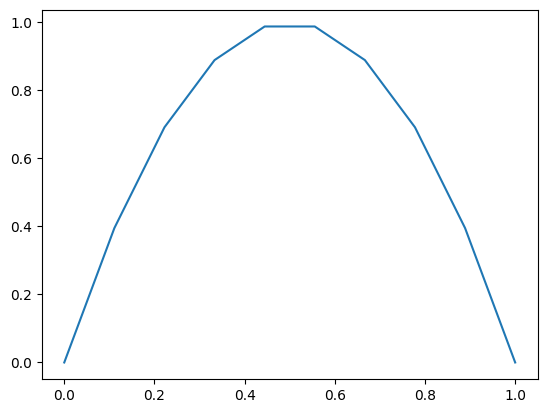

In [36]:
x = np.linspace(0,1,10)
plt.plot(x,f(x))

In [37]:
def tridiagonal(n, a, b):
  return sp.Matrix([
      [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
      for i in range(n)
  ])

In [38]:
r = 1

In [39]:
A = tridiagonal(9,2+2*r,-r)

In [40]:
A

Matrix([
[ 4, -1,  0,  0,  0,  0,  0,  0,  0],
[-1,  4, -1,  0,  0,  0,  0,  0,  0],
[ 0, -1,  4, -1,  0,  0,  0,  0,  0],
[ 0,  0, -1,  4, -1,  0,  0,  0,  0],
[ 0,  0,  0, -1,  4, -1,  0,  0,  0],
[ 0,  0,  0,  0, -1,  4, -1,  0,  0],
[ 0,  0,  0,  0,  0, -1,  4, -1,  0],
[ 0,  0,  0,  0,  0,  0, -1,  4, -1],
[ 0,  0,  0,  0,  0,  0,  0, -1,  4]])

In [41]:
B = tridiagonal(9,2-2*r,r)

In [42]:
B

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [43]:
b = sp.Matrix([f(0.1*(i+1)) for i in range(9)])

In [44]:
b

Matrix([
[0.36],
[0.64],
[0.84],
[0.96],
[ 1.0],
[0.96],
[0.84],
[0.64],
[0.36]])

In [45]:
def crank_nicolson(A, B, b, j):
    b_1 = B*b    # mismo paso inicial de tu función
    S = []       # aquí guardaremos cada solución

    for i in range(j):
        sol = A.LUsolve(b_1)    # u^{n+1}
        S.append(sol.T)         # guardar fila (como vector renglón)
        b_1 = B*sol             # preparar siguiente paso

    # Convertir lista de vectores sympy a una matriz sympy
    return sp.Matrix(S)

In [46]:
j = 50 #Numero de pasos en el tiempo

In [47]:
U = crank_nicolson(A, B, b, j)

In [48]:
data = [list( U.row(i)) for i in range(10)]

print(tabulate(data, tablefmt = "grid"))

+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.301436 | 0.565746 | 0.761547 | 0.880442 | 0.920221 | 0.880442 | 0.761547 | 0.565746 | 0.301436 |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.26763  | 0.504776 | 0.688489 | 0.802994 | 0.841718 | 0.802994 | 0.688489 | 0.504776 | 0.26763  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.23989  | 0.454784 | 0.623126 | 0.729952 | 0.766473 | 0.729952 | 0.623126 | 0.454784 | 0.23989  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.21645  | 0.411015 | 0.564592 | 0.662619 | 0.696285 | 0.662619 | 0.564592 | 0.411015 | 0.21645  |
+----------+----------+----------+----------+----------+----------+----------+----------+----------+
| 0.195788 | 0.372138 | 0.511722 | 0.601117 | 0.631868 | 0.601117 | 0.511722 | 0.372138 | 0

In [49]:
U_np = np.array(U.tolist(), dtype=float)

In [50]:
x = np.linspace(0, 1, 9) #np.linspace() Crea un array de números equiespaciados en un intervalo:
y = np.linspace(0, 0.5, j)
X,Y = np.meshgrid(x, y) #np.meshgrid() Crea matrices de coordenadas a partir de vectores 1D

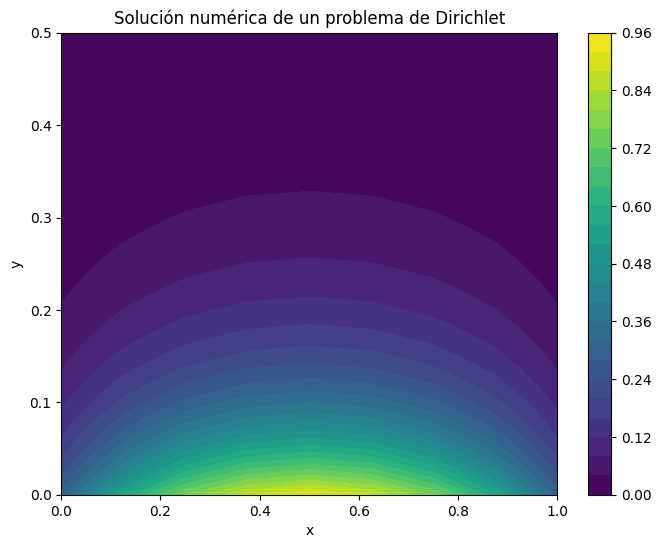

In [51]:
# Mapa de colores
plt.figure(figsize=(8, 6)) #Crea una nueva figura para el gráfico
                            # figsize: (ancho, alto)
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis) #Crea un mapa de contornos relleno (filled contours):
                                                            #X, Y: Coordenadas de la malla
                                                            #U: Valores de la función en cada punto
                                                            #levels: Número de niveles de contorno
                                                            #cmap: Esquema de colores
plt.colorbar(contour) #Añade una barra de colores que muestra la escala:
plt.title('Solución numérica de un problema de Dirichlet') #Añade un título al gráfico
plt.xlabel('x') #Etiquetan los ejes
plt.ylabel('y') #Etiquetan los ejes
plt.axis('auto') #Configura los límites de los ejes automáticamente
plt.show() #Muestra el gráfico en pantalla

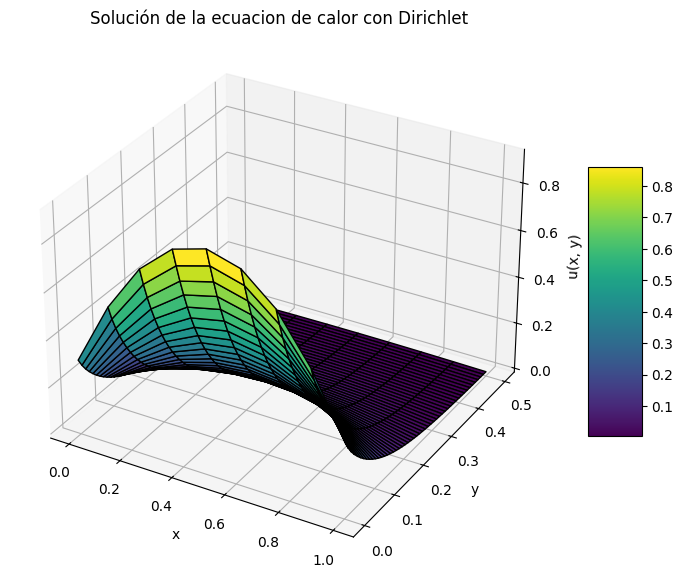

In [52]:
fig = plt.figure(figsize=(10, 7)) #Crea una nueva figura para el gráfico
                                  # figsize: (ancho, alto)
ax = fig.add_subplot(111, projection='3d') #Crea un sistema de ejes 3D dentro de una figura
                                           # (111)Notación de MATLAB para "1 fila, 1 columna, subplot 1"
                                           # projection='3d'Especifica que queremos ejes tridimensionales
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k') #Dibuja una superficie 3D
                                                                #X, Y, U: Coordenadas y valores de la superficie
                                                                #cmap: Mapa de colores para visualizar los valores
                                                                #edgecolor: Color de las líneas de la malla ('k' = negro, 'none' = sin líneas)
ax.set_title('Solución de la ecuacion de calor con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5) #Añade una barra de colores para la superficie
                                         #surf: La superficie a la que se referencia la barra
                                         #shrink: Factor de escala del tamaño (0.0-1.0)
                                         #aspect: Relación de aspecto (ancho/alto)
plt.show() #Muestra el gráfico en pantalla